## **Sentiment Analysis**

In [3]:
import numpy as np
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, Dropout, Conv1D, MaxPooling1D

**Read Data**

In [6]:
with open('dataset.json',encoding='utf-8-sig', errors='ignore') as file:
    json_file = json.load(file)

In [7]:
data = pd.DataFrame(json_file)
data.head()

,comment,sentiment
0,باید کلی بشوری تا از روی صورت پاک بشه بویه ملا...,1
1,خوبه ولی روی موهای من تاثیر زیادی نداشت,0
2,نخرید رنگش در میاد به دست,1
3,بوی خوبی داره و خوب تمیز میکنه ولی اسکراب قوی ...,0
4,هفته پیش گرفتم.ظاهرش خیلی خوبه ولی بعده ۴ ۵ رو...,1


In [8]:
data.shape

(3200, 2)

In [9]:
data.sentiment.unique()

array([1, 0])

In [10]:
data.sentiment.value_counts()

0    2500
1     700
Name: sentiment, dtype: int64

In [11]:
Y = data['sentiment']

In [12]:
data['sentence_no_punctuation'] = data['comment'].str.replace('[^\w\s]','')
data['sentence_no_punctuation'] = data["sentence_no_punctuation"].fillna("fillna")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [13]:
data.head()

,comment,sentiment,sentence_no_punctuation
0,باید کلی بشوری تا از روی صورت پاک بشه بویه ملا...,1,باید کلی بشوری تا از روی صورت پاک بشه بویه ملا...
1,خوبه ولی روی موهای من تاثیر زیادی نداشت,0,خوبه ولی روی موهای من تاثیر زیادی نداشت
2,نخرید رنگش در میاد به دست,1,نخرید رنگش در میاد به دست
3,بوی خوبی داره و خوب تمیز میکنه ولی اسکراب قوی ...,0,بوی خوبی داره و خوب تمیز میکنه ولی اسکراب قوی ...
4,هفته پیش گرفتم.ظاهرش خیلی خوبه ولی بعده ۴ ۵ رو...,1,هفته پیش گرفتمظاهرش خیلی خوبه ولی بعده ۴ ۵ روز...


In [14]:
max_features = 5000
maxlen = 100

In [15]:
tokenizer = Tokenizer(num_words = max_features)

In [16]:
# Convert pandas to numpy
np_data = data["sentence_no_punctuation"].values

In [17]:
np_data

array(['باید کلی بشوری تا از روی صورت پاک بشه بویه ملایمی هم داره  پوست من   مختلطه مخصوص پوست های خشک و معمولیشو گرفتم که زیاد قوی نباشه و پوستمو خشک نکنه الان ۶ ماه دارمش اوایلش راضی بودم اما بعد از مدتی دیدم دور چشمام داره چروکهای خیلی ریز میفته دیگه ۳۴ روز یه بار ازش استفاده میکنم اونم فقط روی قسمته چرب پوستم',
       'خوبه ولی روی موهای من تاثیر زیادی نداشت',
       'نخرید رنگش در میاد به دست', ...,
       'خوبه به بدن نمیچسبه برعکس به لباس خوب می چسبه دوامش هم خوبه',
       'من برای خودم و مادربزرگم گرفتم',
       'خیلی خوبه مرسی دیجی کالا خیلی خوب جی تی ای بازی میکنم باهاش'],
      dtype=object)

## **Install hazm library**

In [18]:
# install hazm library
!pip install hazm
from hazm import word_tokenize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 316 kB 5.2 MB/s 
     |████████████████████████████████| 233 kB 43.1 MB/s 
     |████████████████████████████████| 1.4 MB 48.4 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394485 sha256=d8fd3c93f15df0f411fa2f884dd54388199e6855393ff92ba941a4b70b44d353
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=154917 sha256=1960e458f362df2a418a37f0e3287b6527013315f20d968f3d62810e835d625c
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [19]:
def read_stop_words(filename):
  with open(filename) as stopwords_file:
    stopwords = stopwords_file.readlines()
  stopwords = [line.replace('\n', '') for line in stopwords] 
  return stopwords

In [20]:
stopwords = read_stop_words('stopwords.txt')
print(len(stopwords))

1316


In [21]:
word_tokenized = [word_tokenize(t) for t in np_data]
word_tokenized_filtered = [[w for w in sentence if w not in stopwords] for sentence in word_tokenized]

In [22]:
word_tokenized_filtered[0:5]

[['بشوری',
  'پاک',
  'بشه',
  'بویه',
  'ملایمی',
  'داره',
  'پوست',
  'مختلطه',
  'مخصوص',
  'پوست',
  'خشک',
  'معمولیشو',
  'قوی',
  'نباشه',
  'پوستمو',
  'خشک',
  'نکنه',
  'ماه',
  'دارمش',
  'اوایلش',
  'راضی',
  'مدتی',
  'دیدم',
  'دور',
  'چشمام',
  'داره',
  'چروکهای',
  'ریز',
  'میفته',
  '۳۴',
  'اونم',
  'قسمته',
  'چرب',
  'پوستم'],
 ['خوبه', 'موهای', 'تاثیر', 'زیادی'],
 ['نخرید', 'رنگش', 'میاد', 'دست'],
 ['بوی', 'خوبی', 'داره', 'تمیز', 'میکنه', 'اسکراب', 'قوی'],
 ['هفته',
  'گرفتمظاهرش',
  'خوبه',
  'بعده',
  'دوره',
  'لبش',
  'شکست۵',
  'کار',
  'کنهو',
  'توصیه']]

In [23]:
tokenizer.fit_on_texts(word_tokenized_filtered)

In [24]:
print(tokenizer.word_index)


{'داره': 1, 'کیفیت': 2, 'خوبه': 3, 'عالی': 4, 'پوست': 5, 'خوبی': 6, 'میشه': 7, 'میکنه': 8, 'عالیه': 9, 'خریدم': 10, 'کابل': 11, 'قیمت': 12, 'کرم': 13, 'راضی': 14, 'نسبت': 15, 'محصول': 16, 'پیشنهاد': 17, 'گوشی': 18, 'قیمتش': 19, 'نداره': 20, 'شارژ': 21, 'مناسب': 22, 'خشک': 23, 'کالا': 24, 'نظر': 25, 'رنگ': 26, 'کار': 27, 'دیجی': 28, 'راضیم': 29, 'نرم': 30, 'خرید': 31, 'خوبیه': 32, 'مو': 33, 'بوی': 34, 'چرب': 35, 'جوش': 36, 'جنس': 37, 'میده': 38, 'پاک': 39, 'العاده': 40, 'نمیکنه': 41, 'پوستم': 42, 'ارزش': 43, 'باشه': 44, 'سلام': 45, 'قاب': 46, 'شامپو': 47, 'هستش': 48, 'نمیشه': 49, 'توجه': 50, 'دستم': 51, 'موهای': 52, 'ماه': 53, 'شگفت': 54, 'ضد': 55, 'محصولات': 56, 'سفارش': 57, 'هفته': 58, 'دور': 59, 'ماسک': 60, 'دوستان': 61, 'موهام': 62, 'انگیز': 63, 'کنندگی': 64, 'کیفیتش': 65, 'کاور': 66, 'جذب': 67, 'تاثیر': 68, 'دست': 69, 'سه': 70, 'توصیه': 71, 'حس': 72, 'نظرم': 73, 'خریدش': 74, 'بخرید': 75, 'بشه': 76, 'حالت': 77, 'سرعت': 78, 'مدل': 79, 'مناسبه': 80, 'واسه': 81, 'بسته': 82, 'مرطوب': 83

In [25]:
vocab_size = len(tokenizer.word_index)+1

In [26]:
vocab_size

5667

In [27]:
data = tokenizer.texts_to_sequences(word_tokenized_filtered)

In [28]:
data[0:5]

[[2234,
  39,
  76,
  1491,
  549,
  1,
  5,
  805,
  375,
  5,
  23,
  2235,
  179,
  684,
  437,
  23,
  806,
  53,
  550,
  2236,
  14,
  478,
  113,
  59,
  1134,
  1,
  2237,
  307,
  945,
  2238,
  479,
  1492,
  35,
  42],
 [3, 52, 68, 98],
 [192, 106, 170, 69],
 [34, 6, 1, 111, 8, 376, 179],
 [58, 2239, 3, 1493, 1494, 2240, 2241, 27, 2242, 71]]

In [29]:
data = pad_sequences(data, maxlen = maxlen)

In [30]:
data

array([[   0,    0,    0, ..., 1492,   35,   42],
       [   0,    0,    0, ...,   52,   68,   98],
       [   0,    0,    0, ...,  106,  170,   69],
       ...,
       [   0,    0,    0, ..., 1479, 1236,    3],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,  857,  718,  146]], dtype=int32)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.3, random_state=42)

**Read Stop-Words**

In [38]:
embedding_dim = 50
model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length = maxlen))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 50)           250000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               60400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 310,501
Trainable params: 310,501
Non-trainable params: 0
_________________________________________________________________


In [41]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=6, batch_size=32)

Epoch 1/6
70/70 [==============================] - 9s 106ms/step - loss: 0.5418 - accuracy: 0.7763 - val_loss: 0.4844 - val_accuracy: 0.7885
Epoch 2/6
70/70 [==============================] - 7s 95ms/step - loss: 0.4166 - accuracy: 0.8089 - val_loss: 0.3783 - val_accuracy: 0.8469
Epoch 3/6
70/70 [==============================] - 7s 95ms/step - loss: 0.2349 - accuracy: 0.9125 - val_loss: 0.4140 - val_accuracy: 0.8406
Epoch 4/6
70/70 [==============================] - 7s 96ms/step - loss: 0.1581 - accuracy: 0.9455 - val_loss: 0.4378 - val_accuracy: 0.8156
Epoch 5/6
70/70 [==============================] - 7s 106ms/step - loss: 0.1076 - accuracy: 0.9625 - val_loss: 0.4419 - val_accuracy: 0.8229
Epoch 6/6
70/70 [==============================] - 7s 102ms/step - loss: 0.1092 - accuracy: 0.9652 - val_loss: 0.4951 - val_accuracy: 0.8302


In [43]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

30/30 [==============================] - 1s 26ms/step - loss: 0.4951 - accuracy: 0.8302
Accuracy: 83.02%


In [44]:
def plot_graphs(history, string):
    pyplot.plot(history.history[string])
    pyplot.plot(history.history['val_'+string])
    pyplot.xlabel("Epochs")
    pyplot.ylabel(string)
    pyplot.legend([string, 'val_'+string])
    pyplot.show()

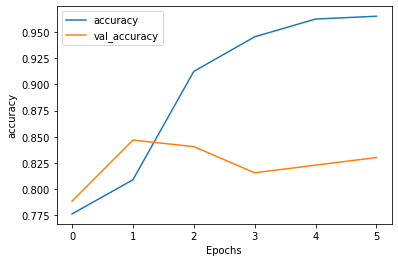

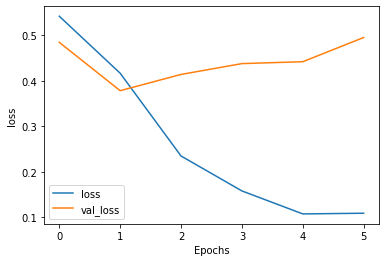

In [45]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [51]:
positive_sentence = "من تو‌ پیشنهاد ویژه گرفتم. خوب بود"
negative_sentence = "الیاف این مسواک از کیفیت خوبی برخوردار نبوده و با هر بار مسواک زدن نیز از جای خود کنده میشد"
positive_sentence2 = "خیلی عالی بود"
negative_sentence2 = "اصلا پیشنهاد نمیکنم پولتون و بابتش بدید"

In [52]:
def prediction(sentence):
  data = tokenizer.texts_to_sequences([sentence])
  data_pad_sequence = pad_sequences(data, maxlen = maxlen)
  perdiction = model.predict(data_pad_sequence)
  print(perdiction[0])
  if perdiction[0][0] > 0.5:
    return "negative"
  else: 
    return "positive"  

In [53]:
prediction(negative_sentence2)

1/1 [==============================] - 0s 49ms/step
[0.9907173]


'negative'